## Observations and Insights

## Dependencies and starter code

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mc_db = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mc_db.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
gd = mca_db.mean()['Tumor Volume (mm3)']
ge = mca_db.median()['Tumor Volume (mm3)']
gf = mca_db.var()['Tumor Volume (mm3)']
gg = mca_db.sem()['Tumor Volume (mm3)']
gx_db = pd.merge(gd, ge, how="left", on=["Drug Regimen"])
gy_db = pd.merge(gf, gg, how="left", on=["Drug Regimen"])
gxx = pd.merge(gx_db, gy_db, how="left", on=["Drug Regimen"])

gxx = gxx.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)","Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)","Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)"})
gxx.head(20)


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


## Bar plots

In [6]:
bar_title = "Data Points per Regimen"
x_label = "Drug Regimen"
y_label = "Data Points"

[Text(0, 0.5, 'Data Points'), Text(0.5, 0, 'Drug Regimen')]

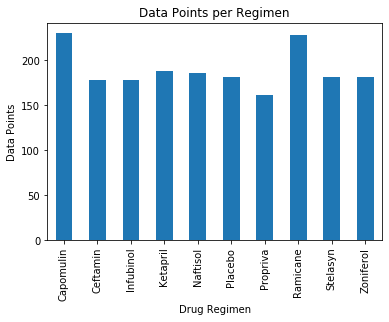

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen'])
datas = mca_db.count()

#let's just pick the first column, rename that and plot.
column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.bar(y='Number of Data Points',title=bar_title,legend=False)
ax.set(xlabel=x_label, ylabel=y_label)

Text(0, 0.5, 'Data Points')

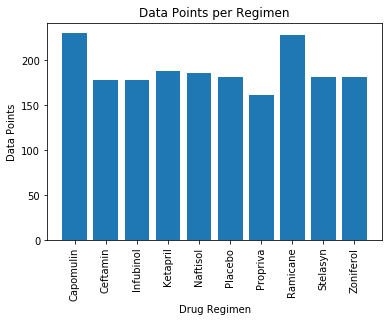

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# https://pythonspot.com/matplotlib-bar-chart/
x_axis = np.arange(len(datas.index))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, datas['Number of Data Points'])
plt.xticks(tick_locations, datas.index, rotation="vertical")

plt.title(bar_title)
plt.xlabel(x_label)
plt.ylabel(y_label)

## Pie plots

In [13]:
pie_title = "Gender of Mice among Samples"

[Text(0, 0.5, '')]

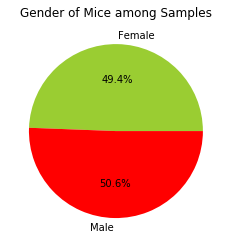

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Sex']) #
datas = mca_db.count()
column_name = datas.columns[0]
datas = datas.rename(columns={column_name: 'Number of Data Points'})
ax = datas.plot.pie(y='Number of Data Points',autopct="%1.1f%%",title = pie_title, legend=False, colors = ["yellowgreen", "red"])
ax.set(ylabel="")

Text(0.5, 1.0, 'Gender of Mice among Samples')

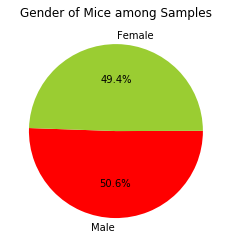

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male','Female']

# The values of each section of the pie chart
sizes = [datas.loc['Male']['Number of Data Points'], datas.loc['Female']['Number of Data Points']]

plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["red", "yellowgreen"])
plt.title(pie_title)

## Quartiles, outliers and boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# OK, what are the *four* most promising?
top_x = 4 #if you want to ask me for top 5 or 6, change this
hd = gxx.sort_values(by=['Mean Tumor Volume (mm3)'])
most_promising =(hd.index[0:top_x])

mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()
gd.head()

timepoints = gd.index.levels[1]
for i in range(top_x):
    print (most_promising[i] + " : " + str(round(gd.loc[most_promising[i],timepoints.max()]['Tumor Volume (mm3)'],2)) + " (mm3)")


Ramicane : 34.96 (mm3)
Capomulin : 36.24 (mm3)
Propriva : 66.26 (mm3)
Ceftamin : 64.13 (mm3)


In [142]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#let's get all of the data
drugs = gd.index.levels[0]
end_size = []

#let's make a dataframe, a dictionary of lists.  make the list:
for drug in drugs:
    end_size.append(gd.loc[drug,timepoints.max()]['Tumor Volume (mm3)'])

end = pd.DataFrame({"Size": end_size},index = drugs)

#Quartile analysis
quartiles = end['Size'].quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor sizes is: {lowerq}")
print(f"The upper quartile of tumor sizes is: {upperq}")
print(f"The interquartile range of tumor sizes is: {iqr}")
print(f"The the median of tumor sizes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#but where are the outliers?
print("=============")
print("Outliers are:")
end.loc[(end["Size"] > upper_bound) | (end["Size"] < lower_bound), "Size"]

The lower quartile of tumor sizes is: 64.53820657155983
The upper quartile of tumor sizes is: 68.34975337772727
The interquartile range of tumor sizes is: 3.811546806167442
The the median of tumor sizes is: 66.10970828892857 
Values below 58.82088636230866 could be outliers.
Values above 74.06707358697844 could be outliers.
Outliers are:


Drug Regimen
Capomulin    36.236114
Ramicane     34.955595
Name: Size, dtype: float64

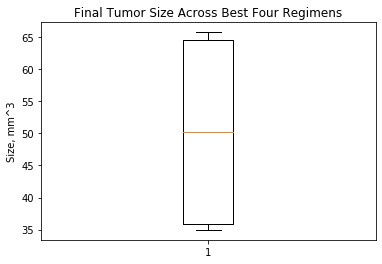

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final = end.sort_values(by=['Size'])
final = final.iloc[0:4] #cut the first four.

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size Across Best Four Regimens')
ax1.set_ylabel('Size, mm^3')
ax1.boxplot(final['Size'])
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Time (Days)')

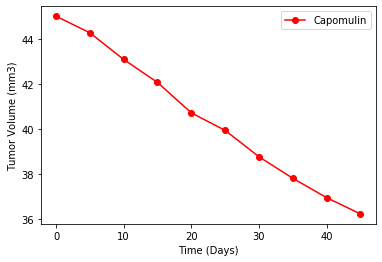

In [176]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()

#because, who cares
del gd['Metastatic Sites']
del gd['Age_months']
del gd['Weight (g)']

gd.head()

def minorMunge(ed, title):
    drugs = ed.index.levels[0]
    timepoints = ed.index.levels[1]
    data = list(ed[title])

    import array as arr
    numbers_array = arr.array('f', data)
    numbers_array[0:len(timepoints)]

    df = pd.DataFrame()
    indx = 0
    endx = len(timepoints)
    for drug in drugs:
        df[drug] = numbers_array[indx:endx].tolist()
        indx += len(timepoints)
        endx += len(timepoints)

    df["Timepoint"] = timepoints
    df.set_index("Timepoint",inplace = True)
    
    return df

import random
def rc():
    r = lambda: random.randint(0,255)
    x = ('#%02X%02X%02X' % (r(),r(),r()))
    return x

df = minorMunge(gd,'Tumor Volume (mm3)')
# Preview that Reformatting worked   
df.head()

# Save the Figure
drugs = df.keys()

colors = ['red','blue','black','green',rc(),rc(),rc(),rc(),rc(),rc()]
markers = ['o','^','D','s','o','^','D','s','o','^']

for i in range(1):
    plt.plot(df.index, df[drugs[i]], marker = markers[i],color=colors[i], label=drugs[i] )

plt.legend(loc="upper right")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')


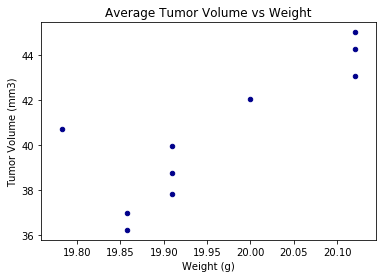

In [193]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mca_db = mc_db.copy()
mca_db = mca_db.groupby(['Drug Regimen','Timepoint'])
gd = mca_db.mean()

del gd['Metastatic Sites']
del gd['Age_months']

capo = gd.loc['Capomulin',:]
capo.head()

ax1 = capo.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', c='DarkBlue', title="Average Tumor Volume vs Weight")


In [200]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capo['Weight (g)'],capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = capo['Weight (g)']
y_values = capo['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)

The correlation between both factors is 0.82
y = 20.29x + -364.52


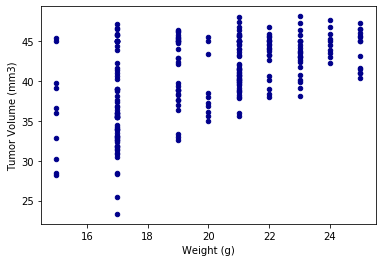

In [196]:
#for fun, do not grade
capx = mc_db.loc[(mc_db["Drug Regimen"] == "Capomulin")]
capx.head()
ax1 = capx.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', c='DarkBlue')
